In [1]:
sc.setCheckpointDir("hdfs://localhost:9000/checkpoint/")


In [2]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)

In [3]:
import pandas as pd
import numpy as np
import pyspark
import pyspark.pandas as ps
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt


In [4]:
# Checking Pandas version:
print(pd.__version__)

2.2.2


In [5]:
pyspark.__version__

'3.4.2'

In [6]:

psdf = ps.read_csv('/ca3/amazon.csv')

/usr/local/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [7]:
type(psdf)

pyspark.pandas.frame.DataFrame

In [8]:
psdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [9]:
psdf.describe()

24/04/12 14:27:11 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,Open,High,Low,Close,Adj Close,Volume
count,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6.770000e+03
mean,35.692191,36.117770,35.235396,35.686546,35.686546,1.391543e+08
std,51.682349,52.279975,51.038981,51.664688,51.664688,1.386193e+08
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06
25%,2.060000,2.098500,2.019000,2.058500,2.058500,6.602200e+07
50%,8.059500,8.229000,8.029500,8.091000,8.091000,1.029340e+08
75%,48.862499,49.075500,48.342499,48.794998,48.794998,1.575780e+08
max,187.240005,188.654007,184.839493,186.570496,186.570496,2.086584e+09


In [10]:
psdf.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int32
dtype: object

## Creating a small dataframe to test the code before applying it to the larger frame:

In [11]:
small_psdf = psdf.head(1000)

In [12]:
small_psdf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1.741378,1.811082,1.667130,1.737398,1.737398,2.632647e+08
std,1.401151,1.450505,1.340613,1.392672,1.392672,2.426221e+08
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06
25%,0.384896,0.391667,0.372917,0.382292,0.382292,1.092600e+08
50%,1.396875,1.456250,1.275000,1.387500,1.387500,1.858780e+08
75%,2.990625,3.137500,2.865625,2.996875,2.996875,3.351840e+08
max,5.596875,5.650000,5.221875,5.334375,5.334375,2.035944e+09


In [13]:
# Creating variance column, that is the difference between the daily highs and lows:

small_psdf["Variance"] = small_psdf["High"] - small_psdf["Low"]

In [14]:
# Creating Daily average column:

small_psdf["Daily_avg"] = (small_psdf["High"] + small_psdf["Low"])/2

In [15]:
small_psdf.describe()

,Open,High,Low,Close,Adj Close,Volume,Variance,Daily_avg
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,1.741378,1.811082,1.667130,1.737398,1.737398,2.632647e+08,0.143952,1.739106
std,1.401151,1.450505,1.340613,1.392672,1.392672,2.426221e+08,0.141914,1.394836
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06,0.000782,0.069010
25%,0.384896,0.391667,0.372917,0.382292,0.382292,1.092600e+08,0.027083,0.382812
50%,1.396875,1.456250,1.275000,1.387500,1.387500,1.858780e+08,0.112500,1.368750
75%,2.990625,3.137500,2.865625,2.996875,2.996875,3.351840e+08,0.214062,2.984375
max,5.596875,5.650000,5.221875,5.334375,5.334375,2.035944e+09,1.178125,5.410938


In [16]:
# Given that a week has 5 days on average, creating a newer dataframe with the average weekly 


# Creating a new column with an index of 
# Enable operations on different DataFrames which is blocked by default by pyspark.
 
# ps.set_option('compute.ops_on_diff_frames', True)

small_psdf["week_num"] = small_psdf["Date"].astype('datetime64').dt.week
small_psdf["year_num"] = small_psdf["Date"].astype('datetime64').dt.year


aggergations = {
    "High":"max",
    "Low":"min",
    "Adj Close": "mean"
}

small_weekly_psdf = small_psdf.groupby(['week_num',"year_num"], as_index=False).agg(aggergations)

/usr/local/spark/python/pyspark/pandas/datetimes.py:128: FutureWarning: weekofyear and week have been deprecated.
  warnings.warn(


In [17]:
small_psdf.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int32
Variance     float64
Daily_avg    float64
week_num       int64
year_num       int64
dtype: object

In [18]:
small_psdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Variance,Daily_avg,week_num,year_num
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.028646,0.110677,20,1997
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.013541,0.092188,20,1997
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.007292,0.084896,21,1997
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.005729,0.084635,21,1997
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.013542,0.075521,21,1997


In [19]:
small_psdf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Variance,Daily_avg,week_num,year_num
995,2001-04-26,0.8125,0.8250,0.7500,0.7715,0.7715,119212000,0.0750,0.78750,17,2001
996,2001-04-27,0.7860,0.7865,0.7510,0.7635,0.7635,88920000,0.0355,0.76875,17,2001
997,2001-04-30,0.7815,0.8450,0.7795,0.7890,0.7890,115606000,0.0655,0.81225,18,2001
998,2001-05-01,0.7950,0.8500,0.7900,0.8445,0.8445,102158000,0.0600,0.82000,18,2001
999,2001-05-02,0.8570,0.8715,0.8420,0.8555,0.8555,149944000,0.0295,0.85675,18,2001


In [20]:
small_psdf.describe()

,Open,High,Low,Close,Adj Close,Volume,Variance,Daily_avg,week_num,year_num
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.741378,1.811082,1.667130,1.737398,1.737398,2.632647e+08,0.143952,1.739106,26.738000,1998.848000
std,1.401151,1.450505,1.340613,1.392672,1.392672,2.426221e+08,0.141914,1.394836,15.049247,1.207623
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06,0.000782,0.069010,1.000000,1997.000000
25%,0.384896,0.391667,0.372917,0.382292,0.382292,1.092600e+08,0.027083,0.382812,14.000000,1998.000000
50%,1.396875,1.456250,1.275000,1.387500,1.387500,1.858780e+08,0.112500,1.368750,27.000000,1999.000000
75%,2.990625,3.137500,2.865625,2.996875,2.996875,3.351840e+08,0.214062,2.984375,40.000000,2000.000000
max,5.596875,5.650000,5.221875,5.334375,5.334375,2.035944e+09,1.178125,5.410938,53.000000,2001.000000


In [21]:
small_weekly_psdf.describe()

,week_num,year_num,High,Low,Adj Close
count,209.000000,209.000000,209.000000,209.000000,209.000000
mean,26.540670,1998.842105,1.908604,1.542496,1.722667
std,15.214477,1.216453,1.548122,1.252202,1.389768
min,1.000000,1997.000000,0.077083,0.065625,0.075208
25%,13.000000,1998.000000,0.400000,0.353125,0.374662
50%,27.000000,1999.000000,1.537500,1.106250,1.299375
75%,40.000000,2000.000000,3.250000,2.650000,2.964531
max,53.000000,2001.000000,5.650000,4.550000,4.835625


In [22]:
small_weekly_psdf.head()

,week_num,year_num,High,Low,Adj Close
0,20,1997,0.125000,0.085417,0.092187
1,21,1997,0.088542,0.065625,0.076667
2,22,1997,0.082292,0.072917,0.076498
3,23,1997,0.085417,0.068750,0.076042
4,24,1997,0.085417,0.076563,0.080000


In [24]:
small_weekly_psdf.rename(columns={
    "Adj Close":"AvgWeekly_AdjClose",
    "High":"WeeklyHigh",
    "Low":"WeeklyLow"
}, inplace=True)

In [25]:
small_weekly_psdf.head()

,week_num,year_num,WeeklyHigh,WeeklyLow,Avg_Weekly_Close
0,20,1997,0.125000,0.085417,0.092187
1,21,1997,0.088542,0.065625,0.076667
2,22,1997,0.082292,0.072917,0.076498
3,23,1997,0.085417,0.068750,0.076042
4,24,1997,0.085417,0.076563,0.080000


## Create a function to group the records in a dataframe, to create a weekly aggregation of average stock price:

In [94]:
# After testing it, Creating a fucntion that can be applied by pyspark to the large dataframe stored on HDFS, n

def agg_daily_to_weekly(psdf):
    
    ps.set_option('compute.ops_on_diff_frames', True)
    
    # Adding a temp index with which aggregate days records into weeks
    psdf["week_num"] = psdf["Date"].astype('datetime64').dt.week
    psdf["year_num"] = psdf["Date"].astype('datetime64').dt.year
    
    aggregations = { 
    "High":"max",
    "Low":"min",
    "Adj Close": "mean"
    }
    weekly_psdf = psdf.groupby(["week_num","year_num"]).agg(aggergations)
    weekly_psdf.rename(columns={        
        "Adj Close":"AvgWeekly_AdjClose",
        "High":"WeeklyHigh",
        "Low":"WeeklyLow"
    }, inplace=True)
    weekly_psdf.reset_index(inplace=True)
    weekly_psdf.sort_values(by=["year_num", "week_num"], inplace=True)
    weekly_psdf.reset_index(inplace=True)
    return weekly_psdf    

### Testing the function:

In [95]:

test_small_weekly = agg_daily_to_weekly(small_psdf)

/usr/local/spark/python/pyspark/pandas/datetimes.py:128: FutureWarning:

weekofyear and week have been deprecated.



In [96]:
test_small_weekly.head(10)

,index,week_num,year_num,WeeklyHigh,WeeklyLow,AvgWeekly_AdjClose
0,33,1,1997,0.252083,0.226563,0.243663
1,0,20,1997,0.125000,0.085417,0.092187
2,1,21,1997,0.088542,0.065625,0.076667
3,2,22,1997,0.082292,0.072917,0.076498
4,3,23,1997,0.085417,0.068750,0.076042
5,4,24,1997,0.085417,0.076563,0.080000
6,5,25,1997,0.080208,0.074740,0.076250
7,6,26,1997,0.077083,0.073958,0.075208
8,7,27,1997,0.095833,0.073958,0.081966
9,8,28,1997,0.128646,0.091667,0.114792


In [97]:
test_small_weekly.tail(10)

,index,week_num,year_num,WeeklyHigh,WeeklyLow,AvgWeekly_AdjClose
199,199,9,2001,0.612500,0.479688,0.543125
200,200,10,2001,0.700000,0.562500,0.606875
201,201,11,2001,0.584375,0.506250,0.541250
202,202,12,2001,0.575000,0.478125,0.511250
203,203,13,2001,0.590000,0.495500,0.536100
204,204,14,2001,0.526500,0.405000,0.436200
205,205,15,2001,0.750500,0.535000,0.639750
206,206,16,2001,0.908000,0.682500,0.770800
207,207,17,2001,0.873000,0.730000,0.786700
208,208,18,2001,0.871500,0.779500,0.829667


### Applying the  function to the main dataset:

In [98]:
weekly_psdf = agg_daily_to_weekly(psdf)

/usr/local/spark/python/pyspark/pandas/datetimes.py:128: FutureWarning:

weekofyear and week have been deprecated.



In [99]:
weekly_psdf.head()

,index,week_num,year_num,WeeklyHigh,WeeklyLow,AvgWeekly_AdjClose
0,97,1,1997,0.252083,0.226563,0.243663
1,1125,20,1997,0.125000,0.085417,0.092187
2,55,21,1997,0.088542,0.065625,0.076667
3,816,22,1997,0.082292,0.072917,0.076498
4,1341,23,1997,0.085417,0.068750,0.076042


In [100]:
weekly_psdf.tail()

,index,week_num,year_num,WeeklyHigh,WeeklyLow,AvgWeekly_AdjClose
1401,29,11,2024,179.529999,171.470001,175.416000
1402,54,12,2024,181.419998,173.520004,177.109995
1403,944,13,2024,181.699997,177.240005,179.555004
1404,454,14,2024,186.270004,178.380005,181.828003
1405,1092,15,2024,187.339996,182.669998,185.603333


In [101]:
weekly_psdf.describe()

,index,week_num,year_num,WeeklyHigh,WeeklyLow,AvgWeekly_AdjClose
count,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000
mean,702.500000,26.601707,2010.312945,36.803186,34.495175,35.694275
std,406.021551,15.093279,7.789139,53.242186,50.048235,51.700710
min,0.000000,1.000000,1997.000000,0.077083,0.065625,0.075208
25%,351.000000,13.000000,2004.000000,2.160156,1.941000,2.060250
50%,702.000000,27.000000,2010.000000,8.267500,7.828500,8.040200
75%,1054.000000,40.000000,2017.000000,49.813999,47.721001,48.740501
max,1405.000000,53.000000,2024.000000,188.654007,182.669998,185.603333


In [102]:

aggregations = {
    "AvgWeekly_AdjClose":"mean",
    "WeeklyHigh":"max",
    "WeeklyLow":"min"
}
annual_psdf = weekly_psdf.groupby("year_num").agg(aggregations).sort_index(ascending=True)
annual_psdf.rename(columns={"AvgWeekly_AdjClose":"AvgYearly_AdjClose", "WeeklyHigh":"AnnualHigh","WeeklyLow":"AnnualLow"},inplace=True)
annual_psdf.head()

,AvgYearly_AdjClose,AnnualHigh,AnnualLow
year_num,,,
1997,0.155860,0.275000,0.065625
1998,0.786447,3.015625,0.207292
1999,3.453050,5.650000,2.050000
2000,2.324318,4.575000,0.743750
2001,0.608311,1.118750,0.275500


In [103]:
annual_psdf.plot()


In [109]:
weekly_psdf.plot(y=["WeeklyHigh","WeeklyLow","AvgWeekly_AdjClose"])

In [111]:
lag_autocorr = []
Avg_Weekly_Close = weekly_psdf.AvgWeekly_AdjClose
for lag in range(1,101):
    lag_autocorr.append([lag, Avg_Weekly_Close.autocorr(lag=lag)])

df_lag_autocorr = pd.DataFrame(lag_autocorr, columns=["Lag","Autocorrelation"])
    
    

24/04/12 14:51:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 1

24/04/12 14:51:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:56 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 1

24/04/12 14:51:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 1

24/04/12 14:51:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:51:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 1

24/04/12 14:52:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 1

24/04/12 14:52:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 1

24/04/12 14:52:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 1

24/04/12 14:52:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 1

24/04/12 14:52:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 1

24/04/12 14:52:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 1

24/04/12 14:52:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 1

24/04/12 14:52:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 1

24/04/12 14:52:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 1

24/04/12 14:52:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 1

24/04/12 14:52:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 14:52:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/12 1

In [112]:
df_lag_autocorr.head(10)

,Lag,Autocorrelation
0,1,0.998970
1,2,0.997600
2,3,0.996263
3,4,0.994964
4,5,0.993734
5,6,0.992626
6,7,0.991462
7,8,0.990250
8,9,0.989098
9,10,0.987804


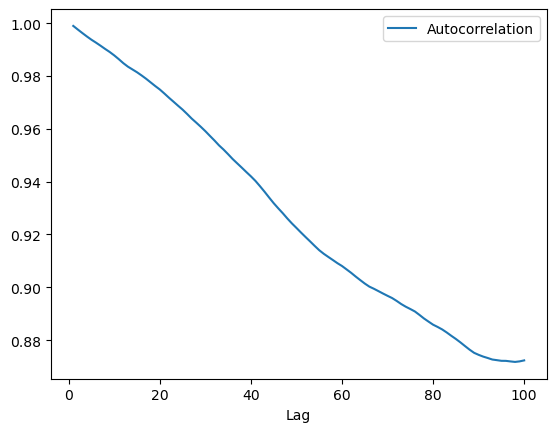

In [116]:
df_lag_autocorr.plot(x="Lag",y="Autocorrelation")
plt.show()

Low autocorrelation indicates that the relation the relationship between the stock prices and the lagged versions of itself is nonlinear

In [117]:
df_lag_autocorr.describe()

,Lag,Autocorrelation
count,100.000000,100.000000
mean,50.500000,0.927931
std,29.011492,0.041229
min,1.000000,0.871749
25%,25.750000,0.891549
50%,50.500000,0.921609
75%,75.250000,0.966037
max,100.000000,0.998970
